In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dask.array
import cartopy.crs as ccrs
import pickle
import matplotlib.colors as colors
import datetime as dt
import pickle
from matplotlib.colors import BoundaryNorm
import glob
import pdb
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')

import calendar
import sys
sys.path.append('/home/563/ab2313/MJO/functions')
import access_functions as af
import subphase_calc_functions as subphase_calc
import access_plot_functions as apf
import load_dataset as load
import phase_calc_functions as phase_calc
from importlib import reload

In [2]:
import miscellaneous as misc

# AWAP Climatologies

In [3]:
awap = load.load_awap()

rmm = load.load_rmm()

awap = awap.where(awap.time.isin(rmm.time.values), drop = True)

In [4]:
awap

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149, time: 7876)
Coordinates:
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * time     (time) datetime64[ns] 1974-10-01 1974-10-02 ... 2017-12-31
Data variables:
    precip   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...

In [5]:
awap_p50 = awap.reduce(np.nanpercentile, q = 50, dim = 'time')
awap_p90 = awap.reduce(np.nanpercentile, q = 90, dim = 'time')
awap_p95 = awap.reduce(np.nanpercentile, q = 95, dim = 'time')

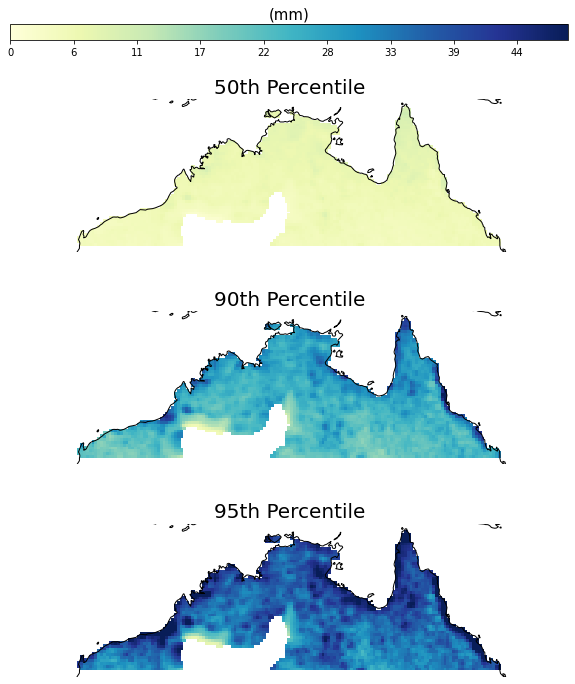

In [55]:
misc = reload(misc)


fig = plt.figure(figsize = (10,12))
gs = gridspec.GridSpec(4,1, height_ratios = [0.1] + [1] * 3, hspace = 0.5, wspace = 0)
# fig.suptitle('Threshold', fontsize = 25)


# # vmax = np.nanpercentile(awap_p95.precip, q = 95)
# # vmin = np.nanpercentile(awap_p50.precip, q = 5)

# num_steps = 15
# cmap = plt.get_cmap('Blues',num_steps)
# # ticks = np.linspace(vmin, vmax, num_steps)
# lower_bound, upper_bound = misc.upper_low_bound(vmin, vmax)
# bounds = np.linspace(lower_bound, upper_bound, num_steps )



'''50th percentile'''
vmax = np.nanpercentile(awap_p95.precip, q = 95)
vmin = np.nanpercentile(awap_p50.precip, q = 5)
vmin = 0

num_steps = 10
cmap = 'YlGnBu'
# cmap = plt.get_cmap('YlGnBu',num_steps)

# ticks = np.linspace(vmin, vmax, num_steps)
lower_bound, upper_bound = misc.upper_low_bound(vmin, vmax)
bounds = np.linspace(lower_bound, upper_bound, num_steps )

ax = fig.add_subplot(gs[1], projection = ccrs.PlateCarree())
awap_p50.precip.plot(ax = ax, add_colorbar = False, vmax = vmax, vmin = vmin, cmap = cmap)
ax.outline_patch.set_visible(False)
ax.set_title('50th Percentile', size = 20)
ax.coastlines(resolution = '50m')


ax = fig.add_subplot(gs[2], projection = ccrs.PlateCarree())
awap_p90.precip.plot(ax = ax, add_colorbar = False, vmax = vmax, vmin = vmin, cmap = cmap)
ax.outline_patch.set_visible(False)
ax.set_title('90th Percentile', size = 20)
ax.coastlines(resolution = '50m')


ax = fig.add_subplot(gs[3],projection = ccrs.PlateCarree())
pdata = awap_p95.precip.plot(ax = ax, add_colorbar = False, vmax = vmax, vmin = vmin,cmap = cmap)
ax.outline_patch.set_visible(False)
ax.set_title('95th Percentile', size = 20)
ax.coastlines(resolution = '50m')


ax = fig.add_subplot(gs[0])
cbar = plt.colorbar(pdata, cax = ax, orientation = 'horizontal', ticks = bounds)#, boundaries = bounds)
cbar.ax.set_title('(mm)', size = 15)
cbar.ax.set_xticklabels(np.round(bounds,0).astype(int));

fig.savefig('images/Threshold_3.png', dpi = 600, bbox_inches = 'tight', pad = 0)


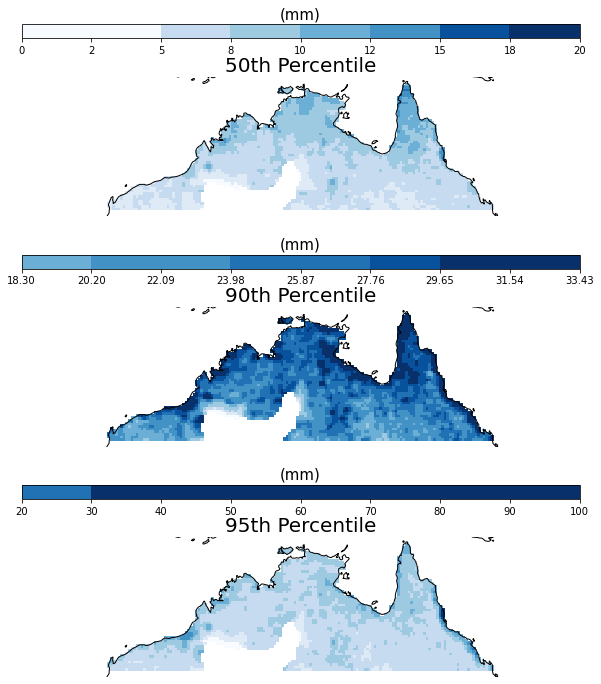

In [41]:
misc = reload(misc)


fig = plt.figure(figsize = (10,12))
gs = gridspec.GridSpec(6,1, height_ratios = [0.1, 1] * 3, hspace = 0.5, wspace = 0)
# fig.suptitle('Threshold', fontsize = 25)


# # vmax = np.nanpercentile(awap_p95.precip, q = 95)
# # vmin = np.nanpercentile(awap_p50.precip, q = 5)

# num_steps = 15
# cmap = plt.get_cmap('Blues',num_steps)
# # ticks = np.linspace(vmin, vmax, num_steps)
# lower_bound, upper_bound = misc.upper_low_bound(vmin, vmax)
# bounds = np.linspace(lower_bound, upper_bound, num_steps )



'''50th percentile'''
# vmax = np.nanpercentile(awap_p50.precip, q = 95)
# vmin = np.nanpercentile(awap_p50.precip, q = 5)
vmin = 0
vmax = 15

num_steps = 9
cmap = plt.get_cmap('Blues',num_steps)
# ticks = np.linspace(vmin, vmax, num_steps)
# lower_bound1, upper_bound1 = misc.upper_low_bound(vmin1, vmax1)
bounds = np.linspace(vmin, vmax, num_steps)

ax = fig.add_subplot(gs[1], projection = ccrs.PlateCarree())
pdata = awap_p50.precip.plot(ax = ax, add_colorbar = False, vmax = vmax, cmap = cmap)
ax.outline_patch.set_visible(False)
ax.set_title('50th Percentile', size = 20)
ax.coastlines(resolution = '50m')


ax = fig.add_subplot(gs[0])
cbar = plt.colorbar(pdata, cax = ax, orientation = 'horizontal', ticks = bounds, boundaries = bounds)
cbar.ax.set_title('(mm)', size = 15)
cbar.ax.set_xticklabels(np.round(bounds1,0).astype(int));






'''90th percentile'''
vmax = np.nanpercentile(awap_p90.precip, q = 95)
vmin = np.nanpercentile(awap_p90.precip, q = 5)

num_steps = 9
cmap = plt.get_cmap('Blues',num_steps)
# ticks = np.linspace(vmin, vmax, num_steps)
# lower_bound, upper_bound = misc.upper_low_bound(vmin, vmax)
# bounds = np.linspace(lower_bound, upper_bound, num_steps )
bounds = np.linspace(vmin, vmax, num_steps)



ax = fig.add_subplot(gs[3], projection = ccrs.PlateCarree())
pdata = awap_p90.precip.plot(ax = ax, add_colorbar = False, vmax = vmax, cmap = cmap)
ax.outline_patch.set_visible(False)
ax.set_title('90th Percentile', size = 20)
ax.coastlines(resolution = '50m')


ax = fig.add_subplot(gs[2])
cbar = plt.colorbar(pdata, cax = ax, orientation = 'horizontal', ticks = bounds, boundaries = bounds)
cbar.ax.set_title('(mm)', size = 15)
cbar.ax.set_xticklabels(np.round(bounds,0).astype(int));




'''95th percentile'''
# vmax = np.nanpercentile(awap_p95.precip, q = 95)
# vmin = np.nanpercentile(awap_p95.precip, q = 5)


num_steps = 9
cmap = plt.get_cmap('Blues',num_steps)
# ticks = np.linspace(vmin, vmax, num_steps)
# lower_bound, upper_bound = misc.upper_low_bound(vmin, vmax)
# bounds = np.linspace(lower_bound, upper_bound, num_steps )
vmin = 20
vmax = 100
bounds = np.linspace(vmin, vmax, num_steps)

ax = fig.add_subplot(gs[5], projection = ccrs.PlateCarree())
awap_p95.precip.plot(ax = ax, add_colorbar = False, vmax = vmax, cmap = cmap)
ax.outline_patch.set_visible(False)
ax.set_title('95th Percentile', size = 20)
ax.coastlines(resolution = '50m')


ax = fig.add_subplot(gs[4])
cbar = plt.colorbar(pdata, cax = ax, orientation = 'horizontal', ticks = bounds, boundaries = bounds)
cbar.ax.set_title('(mm)', size = 15)
cbar.ax.set_xticklabels(np.round(bounds,0).astype(int));



# fig.savefig('method_plots/Threshold_3.png', dpi = 300)


# Point Location

In [56]:
awap_count = awap.count(dim = 'time')
awap_count

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149)
Coordinates:
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
Data variables:
    precip   (lat, lon) int64 0 534 612 693 722 747 848 923 ... 0 0 0 0 0 0 0 0

In [57]:
single_point = awap.where(awap_count == awap_count.precip.max(), drop = True)
single_point

<xarray.Dataset>
Dimensions:  (lat: 1, lon: 1, time: 7876)
Coordinates:
  * lon      (lon) float64 130.5
  * lat      (lat) float64 -13.0
  * time     (time) datetime64[ns] 1974-10-01 1974-10-02 ... 2017-12-31
Data variables:
    precip   (time, lat, lon) float32 nan 1.0179574 ... 1.8618041 2.3081422
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...

In [60]:
p50_s = awap_p50.where(awap_count == awap_count.precip.max(), drop = True)
p50_s_val = p50_s.precip.values
p50_s_val

array([[7.25004292]])

In [61]:
p90_s = awap_p90.where(awap_count == awap_count.precip.max(), drop = True)
p90_s_val = p90_s.precip.values
p90_s_val

array([[27.53767052]])

In [62]:
p95_s = awap_p95.where(awap_count == awap_count.precip.max(), drop = True)
p95_s_val = p95_s.precip.values
p95_s_val

array([[39.12588463]])

In [63]:
fig = plt.figure()
plot_vals = single_point.precip.values.flatten()


N,bins, patches = plt.hist(plot_vals, bins = np.linspace(0,100,100), density = True, range = (1,50));
plt.close(fig)

In [64]:
p90_s_val[0]

array([27.53767052])

In [65]:
np.argwhere(np.round(bins,0) == 28)

array([[28]])

In [66]:
bins

array([  0.        ,   1.01010101,   2.02020202,   3.03030303,
         4.04040404,   5.05050505,   6.06060606,   7.07070707,
         8.08080808,   9.09090909,  10.1010101 ,  11.11111111,
        12.12121212,  13.13131313,  14.14141414,  15.15151515,
        16.16161616,  17.17171717,  18.18181818,  19.19191919,
        20.2020202 ,  21.21212121,  22.22222222,  23.23232323,
        24.24242424,  25.25252525,  26.26262626,  27.27272727,
        28.28282828,  29.29292929,  30.3030303 ,  31.31313131,
        32.32323232,  33.33333333,  34.34343434,  35.35353535,
        36.36363636,  37.37373737,  38.38383838,  39.39393939,
        40.4040404 ,  41.41414141,  42.42424242,  43.43434343,
        44.44444444,  45.45454545,  46.46464646,  47.47474747,
        48.48484848,  49.49494949,  50.50505051,  51.51515152,
        52.52525253,  53.53535354,  54.54545455,  55.55555556,
        56.56565657,  57.57575758,  58.58585859,  59.5959596 ,
        60.60606061,  61.61616162,  62.62626263,  63.63

In [67]:
np.tile(0, len(bins[:end]))

NameError: name 'end' is not defined

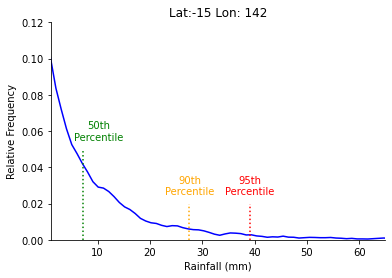

In [101]:
fig, ax = plt.subplots(1,1)
N_pd = pd.Series(N)

N_smooth = N_pd.rolling(window = 3).mean() #Rolling mean in order to smooth out the data
N_comb = np.concatenate([N[1:2], N_smooth.values[3:]])

# N_smooth = N_xr.rolling(window = 3).mean().h.values
end = np.min([len(N_pd),len(N_comb)])

ax.plot(bins[:end],N_comb[:end], color = 'b')


ax.set_xlim(1,65);
ax.set_ylim(0, 0.12)

ax.set_ylabel('Relative Frequency')
ax.set_xlabel('Rainfall (mm)')


ax.plot([p50_s_val[0],p50_s_val[0]],[0,0.05], linestyle = ':', color = 'green');
ax.plot([p90_s_val[0],p90_s_val[0]],[0,0.02], linestyle = ':', color = 'orange');
ax.plot([p95_s_val[0],p95_s_val[0]],[0,0.02], linestyle = ':', color = 'r');


ax.annotate('50th\nPercentile', (p50_s_val[0] + 3 ,0.055), color  = 'green', ha = 'center')
ax.annotate('90th\nPercentile', (p90_s_val[0] ,0.025), color  = 'orange', ha = 'center')
ax.annotate('95th\nPercentile', (p95_s_val[0] ,0.025), color  = 'r', ha = 'center')




start_50 = np.argwhere(np.round(bins,0) == np.round(p50_s_val[0],0))[0][0]
start_90 = np.argwhere(np.round(bins,0) == np.round(p90_s_val[0],0))[0][0]



y1 = N_comb[start_50:start_90]
y2 = np.tile(0, len(y1))

# ax.fill_between(bins[start_50:start_90],y1 ,y2, where  = y2 < y1, facecolor = 'green', alpha = 0.5)




start_90 = np.argwhere(np.round(bins,0) == np.round(p90_s_val[0],0))[0][0] -1
y1 = N_comb[start_90:end]
y2 = np.tile(0, len(y1))

# ax.fill_between(bins[start_90:end],y1 ,y2, where  = y2 < y1, facecolor = 'orange', alpha = 0.5)



start_95 = np.argwhere(np.round(bins,0) == np.round(p95_s_val[0],0))[0][0]
y1 = N_comb[start_95:end]
y2 = np.tile(0, len(y1))

# ax.fill_between(bins[start_95:end],y1 ,y2, where  = y2 < y1, facecolor = 'red', alpha = 0.5)


ax.set_title('Lat:-15 Lon: 142')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


fig.savefig('images_2/rainfall_pdf_3_no_fill.png', dpi = 500, bbox_inches = 'tight', pad = 0)

# Varience Wet Season

In [102]:
awap

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149, time: 7876)
Coordinates:
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * time     (time) datetime64[ns] 1974-10-01 1974-10-02 ... 2017-12-31
Data variables:
    precip   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...

In [105]:
import trend_functions_def as trend_func

In [106]:
awap_ws = trend_func.wet_season_year(awap)

In [107]:
awap_count = awap_ws.resample(time = 'y').count()

In [108]:
awap_sum = awap_ws.resample(time = 'y').sum()

In [109]:
awap_mean = awap_ws.resample(time = 'y').mean()

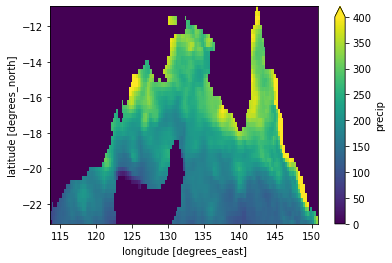

In [110]:
awap_sum.std(dim = 'time').precip.plot(vmax = 400)

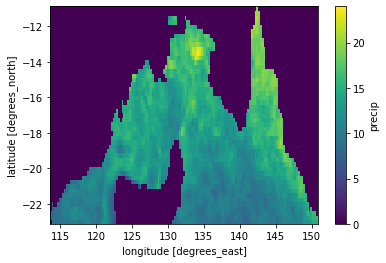

In [111]:
awap_count.std(dim = 'time').precip.plot()

In [112]:
import miscellaneous as misc

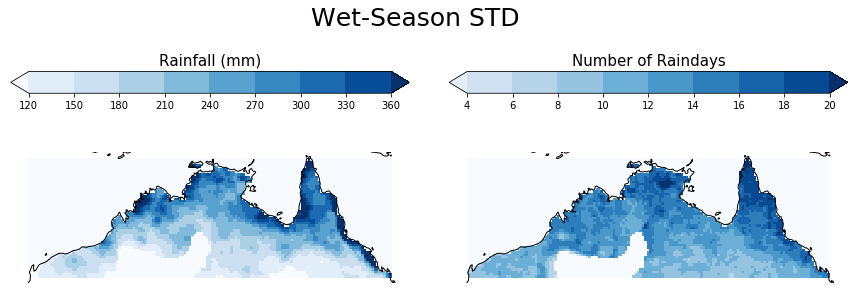

In [64]:
misc = reload(misc)


fig = plt.figure(figsize = (15,9))
gs = gridspec.GridSpec(3,2, height_ratios = [0.1, 1,1], hspace = 0.1, wspace = 0.1)
fig.suptitle('Wet-Season STD', fontsize = 25)



data1 = awap_sum.std(dim = 'time')
data2 = awap_count.std(dim = 'time')
data3 = awap_mean.std(dim = 'time')

#####################
vmax1 = np.nanpercentile(data1.precip, q = 95)
vmin1 = np.nanpercentile(data1.precip, q = 5)

vmax1 = 390
vmin1 = 90

num_steps = 10
cmap = plt.get_cmap('Blues',num_steps)
# lower_bound1, upper_bound1 = misc.upper_low_bound(vmin1, vmax1)
# bounds1 = np.linspace(lower_bound1, upper_bound1, num_steps )
# bounds1 = np.linspace(vmin1, vmax1 + 30, num_steps)
bounds1 = np.arange(vmin1, vmax1 + 30, 30)

ax = fig.add_subplot(gs[1,0], projection = ccrs.PlateCarree())
pdata1 = data1.precip.plot(ax = ax, add_colorbar = False, cmap = cmap, levels = bounds1)
ax.coastlines(resolution = '50m')
ax.outline_patch.set_visible(False)
# ax.set_title('Yearly Average Wet-Season Rainfall Totals', size = 20);

ax = fig.add_subplot(gs[0, 0])
cbar = plt.colorbar(pdata1, cax = ax, orientation = 'horizontal', boundaries = bounds1)
cbar.ax.set_title('Rainfall (mm)', size = 15)



#####################

vmax2 = 22
vmin2 = 2
bounds1 = np.arange(vmin2, vmax2 + 2, 2)
num_steps = len(boudns1)
cmap = plt.get_cmap('Blues',num_steps)

ax = fig.add_subplot(gs[1,1], projection = ccrs.PlateCarree())
pdata2 = data2.precip.plot(ax = ax, add_colorbar = False, cmap = cmap, levels = bounds1)

ax.outline_patch.set_visible(False)
ax.coastlines(resolution = '50m')
# ax.set_title('Yearly Average Wet-Season Rainfall Totals', size = 20);

ax = fig.add_subplot(gs[0, 1])
cbar = plt.colorbar(pdata2, cax = ax, orientation = 'horizontal', boundaries = bounds1)
cbar.ax.set_title('Number of Raindays', size = 15)


# fig.savefig('wet_season_std.png', dpi = 300)

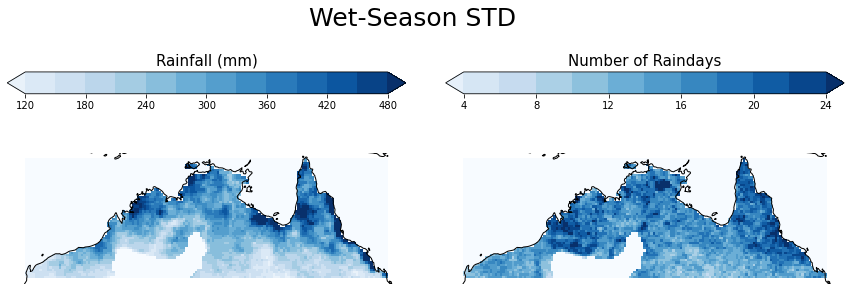

In [121]:
misc = reload(misc)


fig = plt.figure(figsize = (15,9))
gs = gridspec.GridSpec(3,2, height_ratios = [0.1, 1,1], hspace = 0.1, wspace = 0.1)
fig.suptitle('Wet-Season STD', fontsize = 25)



data1 = awap_sum.reduce(np.nanpercentile, q = 75,dim = 'time') - awap_sum.reduce(np.nanpercentile, q = 25,dim = 'time')
data2 = awap_count.reduce(np.nanpercentile, q = 75,dim = 'time') - awap_count.reduce(np.nanpercentile, q = 25,dim = 'time')
data3 = awap_mean.reduce(np.nanpercentile, q = 75,dim = 'time') - awap_mean.reduce(np.nanpercentile, q = 25,dim = 'time')

#####################
vmax1 = np.nanpercentile(data1.precip, q = 95)
vmin1 = np.nanpercentile(data1.precip, q = 5)

vmax1 = 490
vmin1 = 90



# lower_bound1, upper_bound1 = misc.upper_low_bound(vmin1, vmax1)
# bounds1 = np.linspace(lower_bound1, upper_bound1, num_steps )
# bounds1 = np.linspace(vmin1, vmax1 + 30, num_steps)

bounds1 = np.arange(vmin1, vmax1 + 30, 30)
num_steps = len(bounds1)
cmap = plt.get_cmap('Blues',num_steps)
ax = fig.add_subplot(gs[1,0], projection = ccrs.PlateCarree())
pdata1 = data1.precip.plot(ax = ax, add_colorbar = False, cmap = cmap, levels = bounds1)
ax.coastlines(resolution = '50m')
ax.outline_patch.set_visible(False)
# ax.set_title('Yearly Average Wet-Season Rainfall Totals', size = 20);

ax = fig.add_subplot(gs[0, 0])
cbar = plt.colorbar(pdata1, cax = ax, orientation = 'horizontal', boundaries = bounds1)
cbar.ax.set_title('Rainfall (mm)', size = 15)



#####################

vmax2 = 26
vmin2 = 2
bounds1 = np.arange(vmin2, vmax2 + 2, 2)
num_steps = len(bounds1)
cmap = plt.get_cmap('Blues',num_steps)

ax = fig.add_subplot(gs[1,1], projection = ccrs.PlateCarree())
pdata2 = data2.precip.plot(ax = ax, add_colorbar = False, cmap = cmap, levels = bounds1)

ax.outline_patch.set_visible(False)
ax.coastlines(resolution = '50m')
# ax.set_title('Yearly Average Wet-Season Rainfall Totals', size = 20);

ax = fig.add_subplot(gs[0, 1])
cbar = plt.colorbar(pdata2, cax = ax, orientation = 'horizontal', boundaries = bounds1)
cbar.ax.set_title('Number of Raindays', size = 15)


fig.savefig('images_2/wet_season_IQR.png', dpi = 500, bbox_inches = 'tight', pad = 0)

# Varience - total

In [16]:
awap

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149, time: 7876)
Coordinates:
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * time     (time) datetime64[ns] 1974-10-01 1974-10-02 ... 2017-12-31
Data variables:
    precip   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...

In [54]:
awap_var = awap.std(dim = 'time')

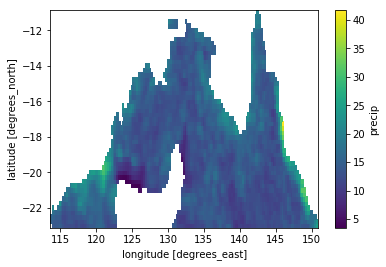

In [55]:
awap_var.precip.plot()

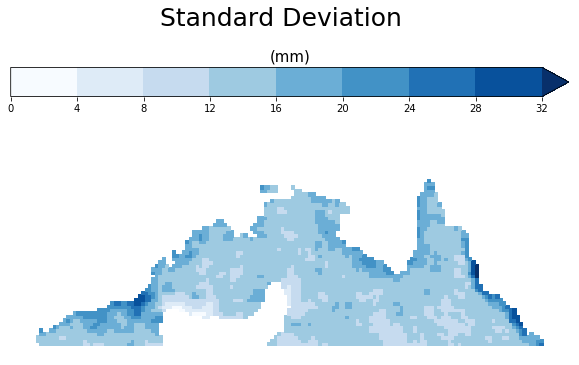

In [72]:

fig = plt.figure(figsize = (10,12))
gs = gridspec.GridSpec(3,1, height_ratios = [0.1, 1,1], hspace = 0.1, wspace = 0)
fig.suptitle('Standard Deviation', fontsize = 25, y = 0.95)

vmax = 32
step = 4
levels = np.arange(0,vmax + step,step)
cmap = plt.get_cmap('Blues',len(levels))
# cmap ='Blues'
ax = fig.add_subplot(gs[1], projection = ccrs.PlateCarree())
pdata = awap_var.precip.plot(ax = ax, add_colorbar = False, vmax = vmax, cmap = cmap, levels = levels)
ax.outline_patch.set_visible(False)





ax = fig.add_subplot(gs[0])
cbar = plt.colorbar(pdata, cax = ax, orientation = 'horizontal', ticks = np.round(levels,0))
cbar.ax.set_title('(mm)', size = 15)

fig.savefig('method_plots/std_2.png', dpi = 300)

# Resamples

In [73]:
awap

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149, time: 7876)
Coordinates:
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * time     (time) datetime64[ns] 1974-10-01 1974-10-02 ... 2017-12-31
Data variables:
    precip   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...

In [65]:
awap_sum_year = awap.resample(time = 'y').sum(dim = 'time').mean(dim = 'time')
awap_count_year = awap.resample(time = 'y').count(dim = 'time').mean(dim = 'time')

In [66]:
awap_sum_year = misc.apply_masks(awap_sum_year)

In [67]:
awap_count_year = misc.apply_masks(awap_count_year)

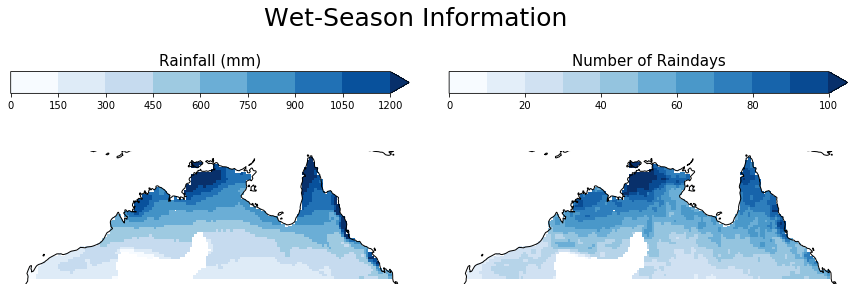

In [68]:
misc = reload(misc)


fig = plt.figure(figsize = (15,9))
gs = gridspec.GridSpec(3,2, height_ratios = [0.1, 1,1], hspace = 0.1, wspace = 0.1)
fig.suptitle('Wet-Season Information', fontsize = 25)

#####################
vmax1 = np.nanpercentile(awap_sum_year.precip, q = 95)
vmin1 = np.nanpercentile(awap_sum_year.precip, q = 0.1)

num_steps = 9
cmap = plt.get_cmap('Blues',num_steps)
lower_bound1, upper_bound1 = misc.upper_low_bound(vmin1, vmax1)
bounds1 = np.linspace(lower_bound1, upper_bound1, num_steps )

ax = fig.add_subplot(gs[2:3], projection = ccrs.PlateCarree())
ax.coastlines(resolution = '50m')
pdata1 = awap_sum_year.precip.plot(ax = ax, add_colorbar = False, cmap = cmap, levels = bounds1,
                                  vmax = upper_bound1)

#                                    vmin = lower_bound1, vmax = upper_bound1, cmap = cmap, levels = bounds1)
ax.outline_patch.set_visible(False)
# ax.set_title('Yearly Average Wet-Season Rainfall Totals', size = 20);

ax = fig.add_subplot(gs[0])
cbar = plt.colorbar(pdata1, cax = ax, orientation = 'horizontal') #ticks = bounds1, boundaries = bounds)
cbar.ax.set_title('Rainfall (mm)', size = 15)






#####################
vmax = 100
step = 10
levels = np.arange(0,vmax + step, step)
cmap = plt.get_cmap('Blues', len(levels))
ax = fig.add_subplot(gs[3:4], projection = ccrs.PlateCarree())
ax.coastlines(resolution = '50m')
pd2 = awap_count_year.precip.plot(ax = ax, add_colorbar = False, vmax = vmax, levels = levels, cmap = cmap)
ax.outline_patch.set_visible(False)
# ax.set_title('Yearly Average Wet-Season Rainfall Totals', size = 20)

ax = fig.add_subplot(gs[1])
cbar = plt.colorbar(pd2, cax = ax, orientation = 'horizontal') #ticks = bounds1, boundaries = bounds)
cbar.ax.set_title('Number of Raindays', size = 15)

fig.savefig('Wet_season_information.png', dpi = 300)
